## Carlos Fernando Gonzalez Sarmiento

In [166]:

from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config

import pandas as pd
import numpy as np
import openpyxl as opx
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt


import multiprocessing

from sklearn.model_selection import train_test_split

### Lectura de bases, por drive o cargandolas directamente del escritorio.

In [167]:
from google.colab import drive #Para que permita abrir Drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
#BASE DE DATOS (BASE ACTUALIZADA PARA EL DÍA 24 DE NOVIEMBRE)
cont = pd.read_csv('/content/drive/MyDrive/Casos_positivos_de_COVID-19_en_Colombia (1).csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [173]:
cont.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


In [174]:
cont[cont['Fecha de diagnóstico'] == '22/11/2021 0:00:00']

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
1460570,23/11/2021 0:00:00,"5,051,423",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,M,En estudio,Hospital UCI,Grave,NaN,NaN,Activo,20/11/2021 0:00:00,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460587,23/11/2021 0:00:00,"5,051,497",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,30,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460589,23/11/2021 0:00:00,"5,051,499",20/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,26,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,11/11/2021 0:00:00,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460600,23/11/2021 0:00:00,"5,051,512",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,27,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,11/11/2021 0:00:00,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1460602,23/11/2021 0:00:00,"5,051,514",20/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,34,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461080,24/11/2021 0:00:00,"5,055,235",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,46,1,M,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461081,24/11/2021 0:00:00,"5,055,249",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,60,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461082,24/11/2021 0:00:00,"5,055,275",21/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN
1461083,24/11/2021 0:00:00,"5,055,276",22/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,En estudio,Casa,Leve,NaN,NaN,Activo,NaN,NaN,22/11/2021 0:00:00,NaN,NaN,NaN,NaN


In [204]:
nov_23 = cont[cont['Fecha de diagnóstico'] == '23/11/2021 0:00:00'].index
cont2 = cont.drop(nov_23)
cont2

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020,0,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,0
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020,0,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,0
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459217,18/11/2021 0:00:00,"5,039,419",13/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,49,1,M,En estudio,Casa,Leve,0,0,Recuperado,8/11/2021,0,16/11/2021 0:00:00,22/11/2021 0:00:00,Tiempo,6.0,0
1459228,18/11/2021 0:00:00,"5,039,430",15/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,69,1,F,En estudio,Casa,Leve,0,0,Recuperado,6/11/2021,0,16/11/2021 0:00:00,20/11/2021 0:00:00,Tiempo,6.0,0
1459231,18/11/2021 0:00:00,"5,039,433",15/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,40,1,M,En estudio,Casa,Leve,0,0,Recuperado,9/11/2021,0,16/11/2021 0:00:00,23/11/2021 0:00:00,Tiempo,6.0,0
1459251,18/11/2021 0:00:00,"5,039,453",16/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,0,0,Recuperado,,0,16/11/2021 0:00:00,20/11/2021 0:00:00,PCR,6.0,0


In [176]:
cont.shape

(1461086, 23)

In [177]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461086 entries, 0 to 1461085
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             1461086 non-null  object 
 1   ID de caso                    1461086 non-null  object 
 2   Fecha de notificación         1461086 non-null  object 
 3   Código DIVIPOLA departamento  1461086 non-null  int64  
 4   Nombre departamento           1461086 non-null  object 
 5   Código DIVIPOLA municipio     1461086 non-null  object 
 6   Nombre municipio              1461086 non-null  object 
 7   Edad                          1461086 non-null  int64  
 8   Unidad de medida de edad      1461086 non-null  int64  
 9   Sexo                          1461086 non-null  object 
 10  Tipo de contagio              1461086 non-null  object 
 11  Ubicación del caso            1456279 non-null  object 
 12  Estado                      

In [178]:
cont.isna().sum()

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                 4807
Estado                             4807
Código ISO del país             1460147
Nombre del país                 1460147
Recuperado                         3766
Fecha de inicio de síntomas      467071
Fecha de muerte                 1428559
Fecha de diagnóstico                224
Fecha de recuperación             34286
Tipo de recuperación              34286
Pertenencia étnica                 1788
Nombre del grupo étnico         1450738
dtype: int64

In [179]:
cont=cont.drop_duplicates()
casos.shape

(1461086, 23)

In [180]:
cont['Ubicación del caso'].value_counts()

Casa            1427814
Fallecido         27720
casa                558
Hospital             95
Hospital UCI         92
Name: Ubicación del caso, dtype: int64

In [183]:
cont[['Código ISO del país']]=cont[['Código ISO del país']].fillna('0').astype('str')
cont[['Código ISO del país']]

,Código ISO del país
0,380.0
1,724.0
2,724.0
3,724.0
4,724.0
...,...
1461081,0
1461082,0
1461083,0
1461084,0


In [184]:
cont[['Nombre del país']]=cont[['Nombre del país']].fillna('0').astype('str')
cont[['Nombre del país']]

,Nombre del país
0,ITALIA
1,ESPAÑA
2,ESPAÑA
3,ESPAÑA
4,ESPAÑA
...,...
1461081,0
1461082,0
1461083,0
1461084,0


In [185]:
cont[['Fecha de inicio de síntomas']]=cont[['Fecha de inicio de síntomas']].fillna('NaN').astype('str')
cont[['Fecha de inicio de síntomas']]= cont['Fecha de inicio de síntomas'].str[:-7]
cont[['Fecha de inicio de síntomas']]

,Fecha de inicio de síntomas
0,27/2/2020
1,6/3/2020
2,7/3/2020
3,6/3/2020
4,6/3/2020
...,...
1461081,
1461082,
1461083,
1461084,


In [186]:
cont[['Fecha de muerte']]=cont[['Fecha de muerte']].fillna('0').astype('str')
cont[['Fecha de muerte']]

,Fecha de muerte
0,0
1,0
2,0
3,0
4,0
...,...
1461081,0
1461082,0
1461083,0
1461084,0


In [187]:
cont[['Nombre del grupo étnico']]=cont[['Nombre del grupo étnico']].fillna('0').astype('str')
cont[['Nombre del grupo étnico']]

,Nombre del grupo étnico
0,0
1,0
2,0
3,0
4,0
...,...
1461081,0
1461082,0
1461083,0
1461084,0


In [188]:
cont=cont.dropna()
cont.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020,0,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,0
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020,0,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,0
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,0
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,0


In [189]:
cont.tail()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
1459217,18/11/2021 0:00:00,"5,039,419",13/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,49,1,M,En estudio,Casa,Leve,0,0,Recuperado,8/11/2021,0,16/11/2021 0:00:00,22/11/2021 0:00:00,Tiempo,6.0,0
1459228,18/11/2021 0:00:00,"5,039,430",15/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,69,1,F,En estudio,Casa,Leve,0,0,Recuperado,6/11/2021,0,16/11/2021 0:00:00,20/11/2021 0:00:00,Tiempo,6.0,0
1459231,18/11/2021 0:00:00,"5,039,433",15/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,40,1,M,En estudio,Casa,Leve,0,0,Recuperado,9/11/2021,0,16/11/2021 0:00:00,23/11/2021 0:00:00,Tiempo,6.0,0
1459251,18/11/2021 0:00:00,"5,039,453",16/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,31,1,F,En estudio,Casa,Leve,0,0,Recuperado,,0,16/11/2021 0:00:00,20/11/2021 0:00:00,PCR,6.0,0
1459274,18/11/2021 0:00:00,"5,039,476",13/11/2021 0:00:00,11,BOGOTA,"11,001",BOGOTA,7,1,M,En estudio,Casa,Leve,0,0,Recuperado,,0,13/11/2021 0:00:00,20/11/2021 0:00:00,PCR,6.0,0


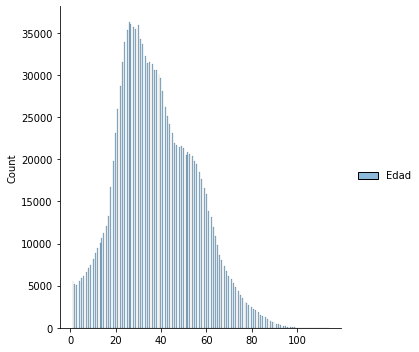

In [191]:
sns.displot(cont[["Edad"]])

In [192]:
cont["Edad"].describe()

count    1.425454e+06
mean     3.790501e+01
std      1.712822e+01
min      1.000000e+00
25%      2.600000e+01
50%      3.600000e+01
75%      5.000000e+01
max      1.140000e+02
Name: Edad, dtype: float64

In [193]:
cont["Sexo"].value_counts()

F    766790
M    658654
m         5
f         5
Name: Sexo, dtype: int64

<BarContainer object of 2 artists>

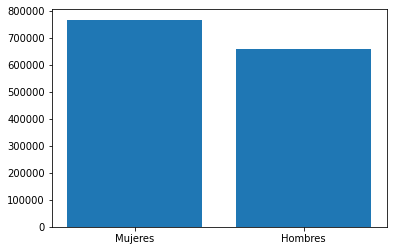

In [197]:
plt.bar(["Mujeres","Hombres"],[766790,658654])

In [195]:
cont["Tipo de contagio"].value_counts()

En estudio     689815
Relacionado    519050
Comunitaria    215663
Importado         926
Name: Tipo de contagio, dtype: int64

<BarContainer object of 4 artists>

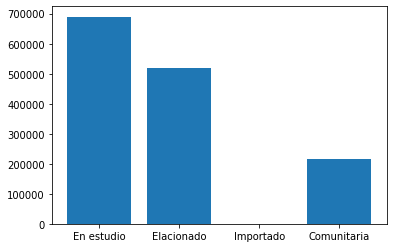

In [196]:
plt.bar(["En estudio","Elacionado","Importado","Comunitaria"],[689815,519050,926,215663])

In [ ]:
cont["Estado"].value_counts()

Leve        1424618
leve            819
Moderado          9
Grave             8
Name: Estado, dtype: int64

In [199]:
cont["Ubicación del caso"].value_counts()

Casa            1424879
casa                558
Hospital              9
Hospital UCI          8
Name: Ubicación del caso, dtype: int64

<BarContainer object of 3 artists>

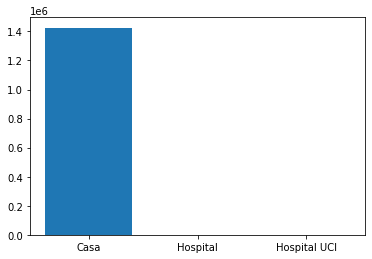

In [ ]:
plt.bar(["Casa","Hospital","Hospital UCI"],[1424879+558,9,8])

In [200]:
cont["Tipo de recuperación"].value_counts()


Tiempo    1135671
PCR        289783
Name: Tipo de recuperación, dtype: int64

<BarContainer object of 2 artists>

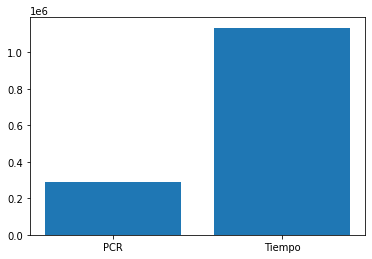

In [201]:
plt.bar(["PCR","Tiempo"],[289783,1135671])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


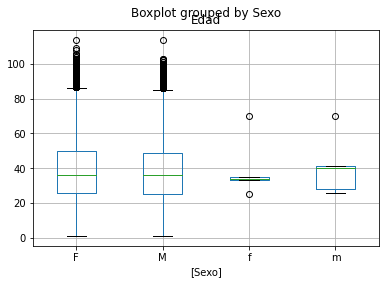

In [202]:
cont[['Edad','Sexo']].boxplot(by='Sexo')# no tuve tiempo para cambiarlo

In [203]:
cont["Recuperado"].value_counts()

Recuperado    1425454
Name: Recuperado, dtype: int64

In [ ]:
cont.shape

(1425454, 23)

In [206]:
datos2 = cont2.copy()

In [219]:
#SE TOMA LA FECHA DE DIAGNÓSTICO SIN LA HORA
datos2['Fecha de diagnóstico']=datos['Fecha de diagnóstico'].str[:-7]
datos2.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,x,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020,0,6/3/2020,1.0,13/3/2020 0:00:00,PCR,6.0,0
1,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,11/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,0
2,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020,0,11/3/2020,1.0,23/3/2020 0:00:00,PCR,6.0,0
3,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,12/3/2020,1.0,21/3/2020 0:00:00,PCR,6.0,0
4,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,"11,001",BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020,0,12/3/2020,1.0,31/3/2020 0:00:00,PCR,6.0,0


In [220]:
datos2.insert(19,'x',np.ones(datos2.shape[0]))
datos2

ValueError: ignored

In [221]:
mod = datos2[['Fecha de diagnóstico','x']]
mod

,Fecha de diagnóstico,x
0,6/3/2020,1.0
1,11/3/2020,1.0
2,11/3/2020,1.0
3,12/3/2020,1.0
4,12/3/2020,1.0
...,...,...
1459217,16/11/2021,1.0
1459228,16/11/2021,1.0
1459231,16/11/2021,1.0
1459251,16/11/2021,1.0


In [222]:
mod['Fecha de diagnóstico'] = pd.to_datetime(mod['Fecha de diagnóstico'],dayfirst = True) #Transformamos en una fecha 
mod = mod.set_index('Fecha de diagnóstico')
mod


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-11,1.0
2020-03-11,1.0
2020-03-12,1.0
2020-03-12,1.0
...,...
2021-11-16,1.0
2021-11-16,1.0
2021-11-16,1.0


In [223]:
mod = mod.rename(columns={'x': 'y'})

In [224]:
mod = mod.resample('D').sum()
mod

,y
Fecha de diagnóstico,
2020-03-06,1.0
2020-03-07,0.0
2020-03-08,0.0
2020-03-09,0.0
2020-03-10,0.0
...,...
2021-11-12,128.0
2021-11-13,63.0
2021-11-14,29.0


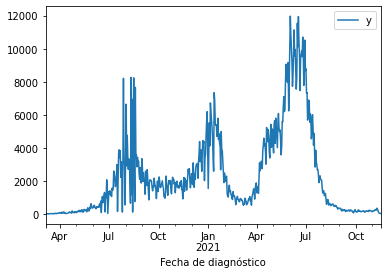

In [225]:
mod.plot()

In [226]:
y = pd.DataFrame(mod.reset_index(drop=True))
y

,y
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
616,128.0
617,63.0
618,29.0
619,21.0


In [227]:
X=pd.DataFrame(mod.index)
X

,Fecha de diagnóstico
0,2020-03-06
1,2020-03-07
2,2020-03-08
3,2020-03-09
4,2020-03-10
...,...
616,2021-11-12
617,2021-11-13
618,2021-11-14
619,2021-11-15


In [228]:
X['Fecha de diagnóstico'] = pd.to_datetime(X['Fecha de diagnóstico'])
X['Fecha de diagnóstico']=X['Fecha de diagnóstico'].map(dt.datetime.toordinal)
X


,Fecha de diagnóstico
0,737490
1,737491
2,737492
3,737493
4,737494
...,...
616,738106
617,738107
618,738108
619,738109


In [239]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)


In [240]:
mlr = MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(3,3),random_state=1)

In [241]:
mlr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
             solver='lbfgs')

In [242]:
mlr.score(X_train,y_train)

0.00010030932676841076

In [243]:
prediccion = pd.DataFrame(mlr.predict(X_test))
prediccion

,0
0,2362.296737
1,2362.101463
2,2363.497190
3,2363.676457
4,2361.851769
...,...
151,2363.113045
152,2363.154661
153,2363.145057
154,2361.877379


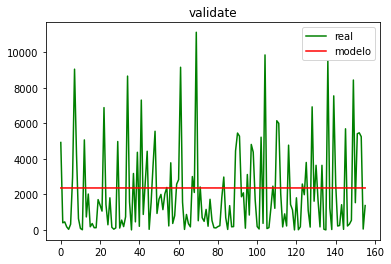

In [244]:
results = mlr.predict(X_test)
plt.plot(range(len(y_test)),y_test,c='g',label='real')
plt.plot(range(len(results)),results,c='r',label='modelo')
plt.title('validate')
plt.legend(loc='best')

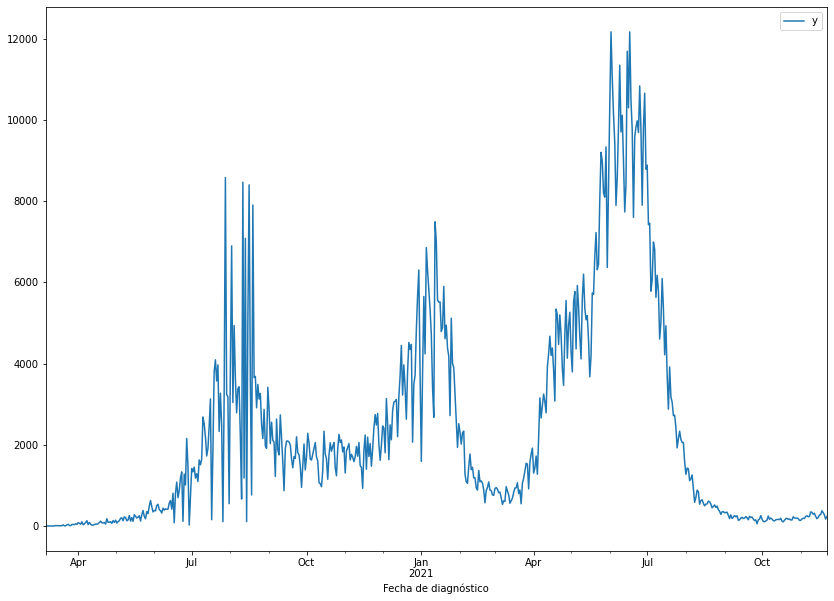

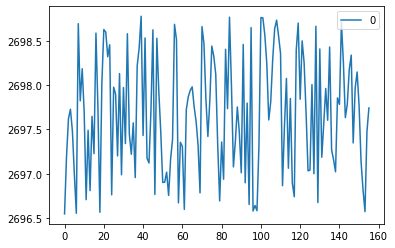

In [237]:
fig, ax = plt.subplots(figsize=(14, 10))
serie.plot(ax=ax,label='seri')
prediccion.plot()